In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from wordcloud import WordCloud, STOPWORDS 
import re

In [2]:
df=pd.read_csv('../data/Clean_Headphone_Dataset.csv')

In [3]:
df.head()

,Rating,verified,reviewerID,asin,reviewerName,unixReviewTime,category,description,title,also_buy,...,rank,also_view,main_cat,similar_item,date,price,review_text,time,rating_class,clean_text
0,5,True,A38RQFVQ1AKJQQ,4126895493,George Walker,1424563200,"['Electronics', 'Headphones', 'Over-Ear Headph...",['Brand new and High quality! Enjoy your favor...,HeadGear 3.5mm Foldable Headphone Headset for ...,"['B00W87LKXE', 'B019PO1ZRI', 'B019PO1ZMI', 'B0...",...,"['>#316,475 in Cell Phones & Accessories (See ...","['B019PO1ZRI', 'B00W87LKXE', 'B019PO1ZNC', 'B0...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...",NaN,$7.99,Five Stars Great headphones. It's just the cor...,2015-02-22,good,five star great headphones cord short
1,5,True,A299MRB9O6GWDE,4126895493,Carolyn B,1494201600,"['Electronics', 'Headphones', 'Over-Ear Headph...",['Brand new and High quality! Enjoy your favor...,HeadGear 3.5mm Foldable Headphone Headset for ...,"['B00W87LKXE', 'B019PO1ZRI', 'B019PO1ZMI', 'B0...",...,"['>#316,475 in Cell Phones & Accessories (See ...","['B019PO1ZRI', 'B00W87LKXE', 'B019PO1ZNC', 'B0...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...",NaN,$7.99,Officewear Really like these headphone. Wante...,2017-05-08,good,officewear really like headphone want somethin...
2,1,True,A3ACFC6DQQLIQT,4126895493,MK,1478304000,"['Electronics', 'Headphones', 'Over-Ear Headph...",['Brand new and High quality! Enjoy your favor...,HeadGear 3.5mm Foldable Headphone Headset for ...,"['B00W87LKXE', 'B019PO1ZRI', 'B019PO1ZMI', 'B0...",...,"['>#316,475 in Cell Phones & Accessories (See ...","['B019PO1ZRI', 'B00W87LKXE', 'B019PO1ZNC', 'B0...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...",NaN,$7.99,For the money they are fine. Just hope they ho...,2016-11-05,bad,money fine hope hold wire headphone break less...
3,3,True,A36BC0YFDBNB5X,4126895493,bigboy,1474675200,"['Electronics', 'Headphones', 'Over-Ear Headph...",['Brand new and High quality! Enjoy your favor...,HeadGear 3.5mm Foldable Headphone Headset for ...,"['B00W87LKXE', 'B019PO1ZRI', 'B019PO1ZMI', 'B0...",...,"['>#316,475 in Cell Phones & Accessories (See ...","['B019PO1ZRI', 'B00W87LKXE', 'B019PO1ZNC', 'B0...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...",NaN,$7.99,Three Stars Very good,2016-09-24,good,three star good
4,1,True,A212PQ0HQPNNWM,4126895493,Kelly Hales,1468713600,"['Electronics', 'Headphones', 'Over-Ear Headph...",['Brand new and High quality! Enjoy your favor...,HeadGear 3.5mm Foldable Headphone Headset for ...,"['B00W87LKXE', 'B019PO1ZRI', 'B019PO1ZMI', 'B0...",...,"['>#316,475 in Cell Phones & Accessories (See ...","['B019PO1ZRI', 'B00W87LKXE', 'B019PO1ZNC', 'B0...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...",NaN,$7.99,Currently returning this product because the s...,2016-07-17,bad,currently return product sound not come curren...


### Total reviews per rating

In [4]:
df_count=df.groupby('Rating').count()['reviewerID']
df_count

Rating
1     1485
2     1421
3     2425
4     5130
5    14727
Name: reviewerID, dtype: int64

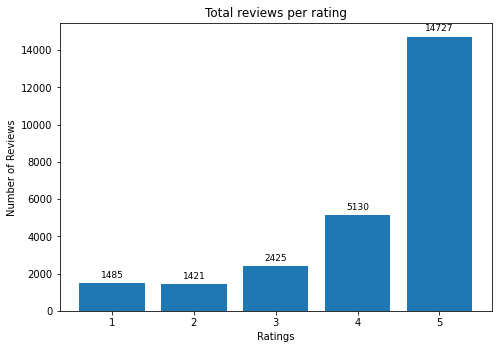

In [32]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ratings = list(df_count.index)
count = list(df_count)
ax.bar(ratings,count)
for bar in ax.patches: 
    ax.annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=9, xytext=(0, 8), 
                   textcoords='offset points') 
plt.title('Total reviews per rating')
plt.xlabel('Ratings')
plt.ylabel('Number of Reviews')
plt.show()

### Top 20 reviewed brands

In [6]:
df_brand=df.groupby('brand').count()['reviewerID'].sort_values(ascending=False)
df_brand[:20]

brand
Sony               6111
Sennheiser         4663
Koss               2878
Panasonic          2162
Belkin             2041
Audio-Technica     1088
Behringer           999
turelar             668
Zalman              653
Maxell              520
Cyber Acoustics     426
Etre Jeune          409
CAD Audio           389
JLAB                365
JVC                 272
Hosa                199
DTOL                173
EldHus              160
Coby                121
Ultrasone           100
Name: reviewerID, dtype: int64

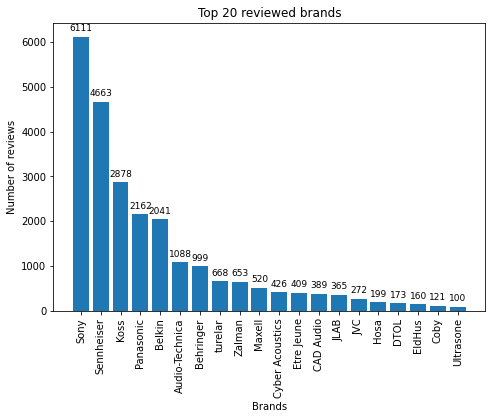

In [31]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
brands = list(df_brand.index[:20])
count = list(df_brand)[:20]
ax.bar(brands,count)
for bar in ax.patches: 
    ax.annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=9, xytext=(0, 8), 
                   textcoords='offset points') 
plt.xticks(rotation=90)
plt.title('Top 20 reviewed brands')
plt.xlabel('Brands')
plt.ylabel('Number of reviews')
plt.show()

In [8]:
df_mean_rating = df.groupby('brand').agg({'Rating':'mean'}).sort_values(by=['Rating'],ascending=False)

### Top 20 reviewed products

In [9]:
df_product=df.groupby('title').count()['reviewerID'].sort_values(ascending=False)

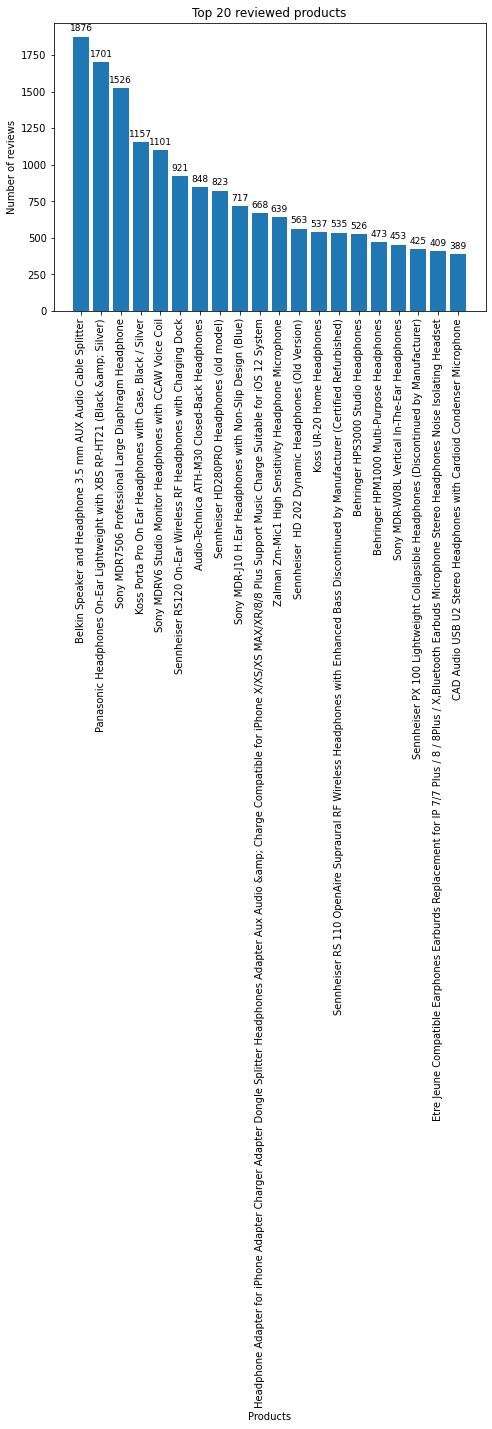

In [30]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
products = list(df_product.index[:20])
count = list(df_product)[:20]
ax.bar(products,count)
for bar in ax.patches: 
    ax.annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=9, xytext=(0, 8), 
                   textcoords='offset points') 
plt.xticks(rotation=90)
plt.title('Top 20 reviewed products')
plt.xlabel('Products')
plt.ylabel('Number of reviews')
plt.show()

In [11]:
df.columns

Index(['Rating', 'verified', 'reviewerID', 'asin', 'reviewerName',
       'unixReviewTime', 'category', 'description', 'title', 'also_buy',
       'brand', 'feature', 'rank', 'also_view', 'main_cat', 'similar_item',
       'date', 'price', 'review_text', 'time', 'rating_class', 'clean_text'],
      dtype='object')

### Disitribution of Categories

In [12]:
df['category'] = df['category'].apply(eval)

In [13]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

In [14]:
df_category = pd.DataFrame(to_1D(df['category']).value_counts(),columns=['count']).reset_index()
df_category.rename({'index': 'category'},axis=1,inplace=True)
df_category['category'] = df_category['category'].map(lambda x: re.sub(r'&amp;', '&', x))
df_category.loc[df_category['count'] < 1000, 'category'] = 'Others'

others_count=df_category[df_category['category'] == 'Others']['count'].sum()
df_category.drop(df_category[df_category['category'] =='Others'].index,inplace=True)
df_category.loc[len(df_category.index)] = ['Others',others_count]
df_category

,category,count
0,Electronics,25188
1,Headphones,19430
2,Over-Ear Headphones,10101
3,On-Ear Headphones,4381
4,Audio & Video Accessories,3961
5,Headphone Accessories,3352
6,Earbud Headphones,2950
7,Adapters,2756
8,Accessories & Supplies,2553
9,Computer Accessories & Peripherals,1554


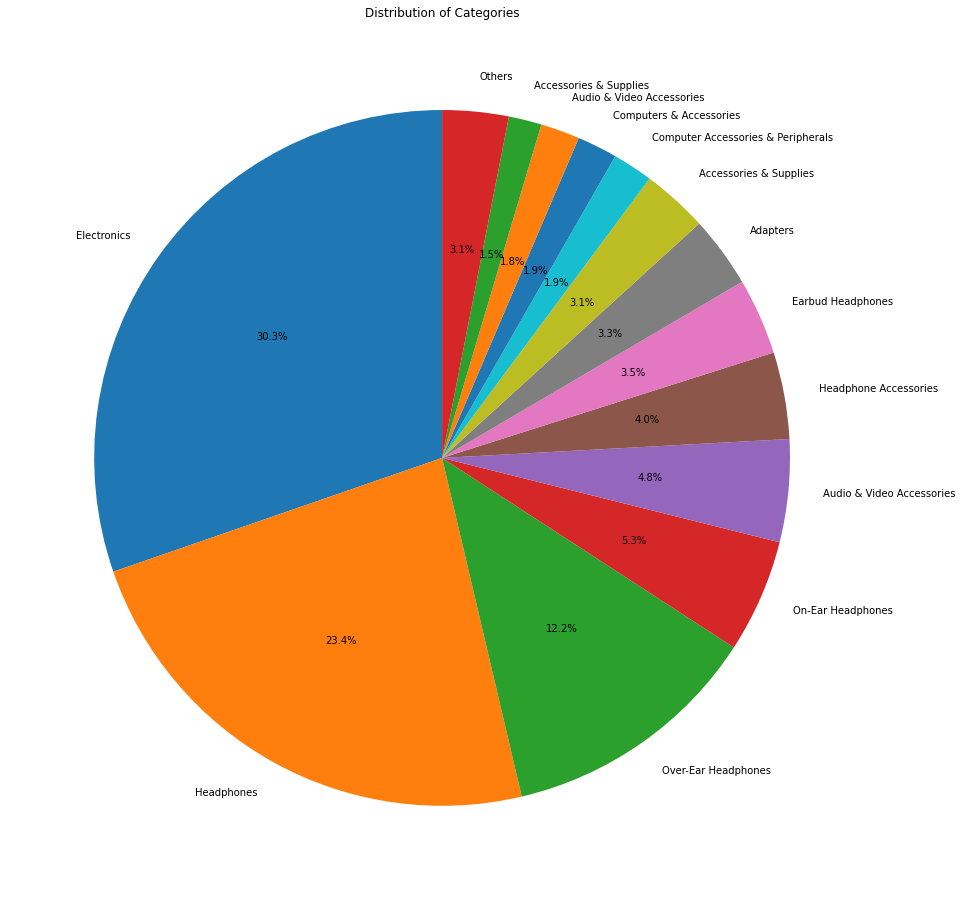

In [15]:
category = df_category['category']
sizes = df_category['count']
#fig1, ax1 = plt.subplots()
plt.figure(figsize=(100, 16))
plt.pie(sizes, labels=category, autopct='%1.1f%%',
        shadow=False, startangle=90)
plt.title('Distribution of Categories')
plt.show()

In [16]:
df_brand_class = df.groupby(['brand','rating_class']).agg({'Rating':'sum'}).sort_values(by='brand',ascending=False)
df_brand_class[:20]

Rating
brand      rating_class        
turelar    good            2933
           bad               67
jWIN       good              26
           bad                1
Zalman     good            2402
           bad              151
Yamaha     good             261
           bad               10
Vic Firth  good             107
           bad                4
Ultrasone  good             423
           bad               14
Tripp Lite good             109
Technics   good             130
Targus     good               3
           bad                2
StarTech   good              43
Stanton    good             136
           bad                4
Sony       good           24378

<AxesSubplot:xlabel='brand'>

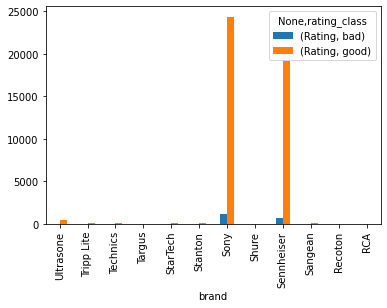

In [17]:
df_brand_class[10:30].unstack().plot(kind='bar', stacked=False)

In [18]:
df.columns

Index(['Rating', 'verified', 'reviewerID', 'asin', 'reviewerName',
       'unixReviewTime', 'category', 'description', 'title', 'also_buy',
       'brand', 'feature', 'rank', 'also_view', 'main_cat', 'similar_item',
       'date', 'price', 'review_text', 'time', 'rating_class', 'clean_text'],
      dtype='object')

In [19]:
word_count = df.clean_text.str.split(expand=True).stack().value_counts()

In [20]:
df1=df.groupby(["brand"]).get_group("Sony")

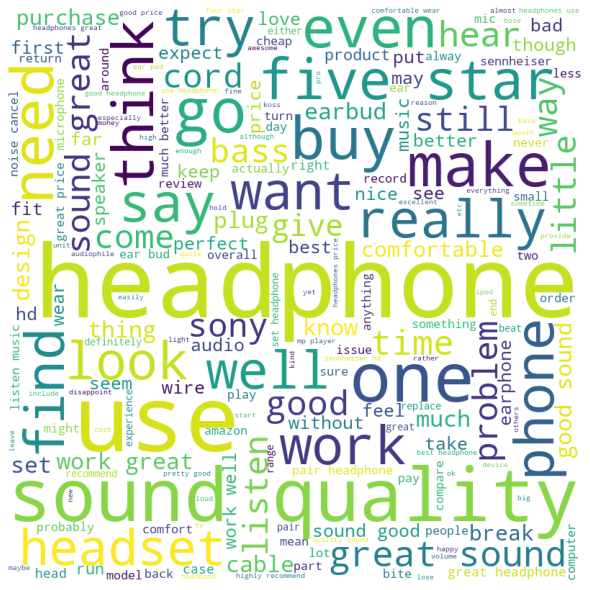

In [21]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.clean_text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### Distribution of main catgeories

In [22]:
df['main_cat'] = df['main_cat'].map(lambda x: re.sub(r'&amp;', '&', x))
df_main_category = pd.DataFrame(df['main_cat'].value_counts()).reset_index()
df_main_category.columns=['category','count']
df_main_category.drop(df_main_category[df_main_category['category'] =='All Electronics'].index,inplace=True)
df_main_category

,category,count
0,Home Audio & Theater,17274
1,Musical Instruments,5230
3,Cell Phones & Accessories,668
4,Amazon Home,160
5,Camera & Photo,41
6,Computers,3


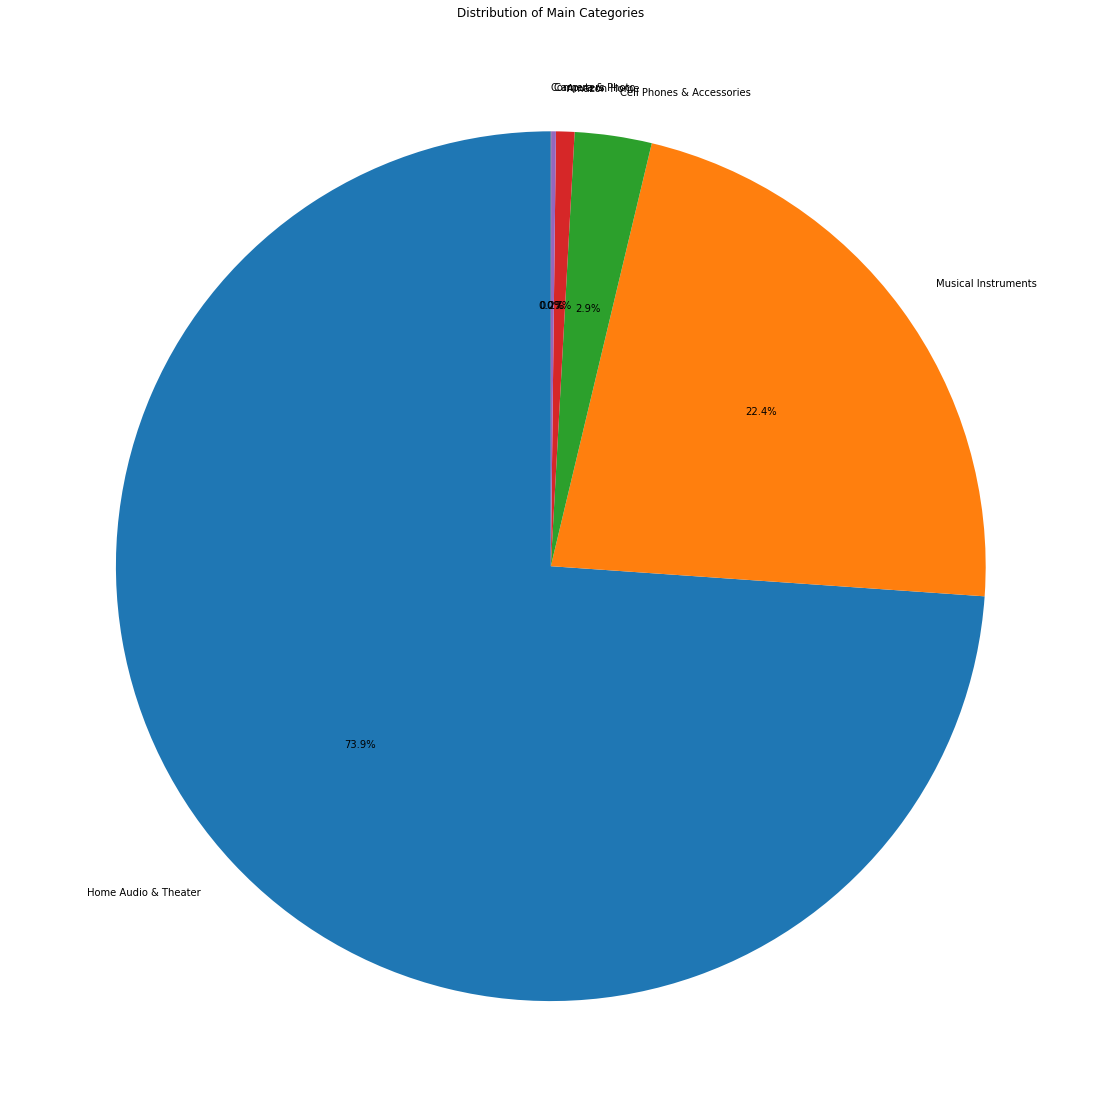

In [29]:
category = df_main_category['category']
sizes = df_main_category['count']
#fig1, ax1 = plt.subplots()
plt.figure(figsize=(25, 20))
plt.pie(sizes, labels=category, autopct='%1.1f%%',
        shadow=False, startangle=90)
plt.title('Distribution of Main Categories')
plt.show()

### Ratings for Top 10 reviewed brands

In [24]:
df_rating_brand=df.loc[df['brand'].isin(df_brand[:10].index)]
df_rating_brand=pd.DataFrame(df_rating_brand.groupby(['brand', 'Rating']).size(),columns=[''])
df_rating_brand

brand          Rating      
Audio-Technica 1         17
               2         41
               3        104
               4        256
               5        670
Behringer      1         54
               2         71
               3        122
               4        215
               5        537
Belkin         1        134
               2         56
               3        122
               4        295
               5       1434
Koss           1        127
               2        187
               3        280
               4        628
               5       1656
Maxell         1         78
               2         42
               3         62
               4         86
               5        252
Panasonic      1         95
               2         94
               3        219
               4        484
               5       1270
Sennheiser     1        243
               2        222
               3        450
               4        963
               5       2785
Sony           1        358
               2        407
               3        564
               4       1224
               5       3558
Zalman         1         67
               2         42
               3         83
               4        152
               5        309
turelar        1         33
               2         17
               3         31
               4         95
               5        492

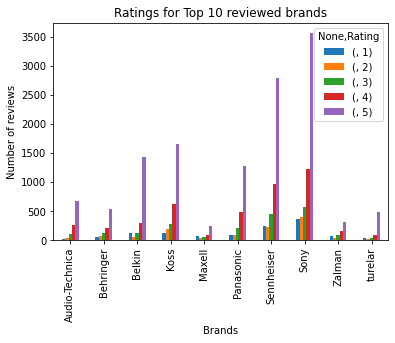

In [25]:
#df_rating_brand.set_axis(['brand','rating'],axis=1, inplace=False).plot(kind='bar')
df_rating_brand.unstack().plot(kind='bar')
plt.title('Ratings for Top 10 reviewed brands')
plt.xlabel('Brands')
plt.ylabel('Number of reviews')
plt.show()

The bar chart above gives us how the rating for different products under a brand is distributed over the ratings 1 to 5

In [26]:
df_brand_class = df.groupby(['brand','rating_class']).agg({'Rating':'sum'}).sort_values(by=['brand','rating_class'],ascending=False)
df_brand_class

Rating
brand   rating_class        
turelar good            2933
        bad               67
jWIN    good              26
        bad                1
Zalman  good            2402
...                      ...
Aiwa    good              24
        bad                4
Advent  good              27
        bad                3
ART     good               9

[99 rows x 1 columns]

<AxesSubplot:xlabel='brand'>

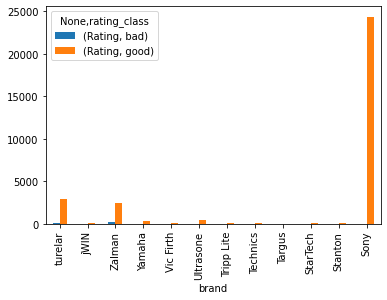

In [27]:
df_brand_class[0:20].unstack().plot(kind='bar', stacked=False)

In [28]:
df['main_cat'].unique()

array(['Musical Instruments', 'Home Audio & Theater', 'Computers',
       'All Electronics', 'Camera & Photo', 'Amazon Home',
       'Cell Phones & Accessories'], dtype=object)